Siddhanth Kumar
Section 102

# Workshop 8: Numerical differentiation and integration

**Submit this notebook to bCourses to receive a grade for this Workshop.**

Please complete workshop activities in code cells in this iPython notebook. The activities titled **Practice** are purely for you to explore Python, and no particular output is expected. Some of them have some code written, and you should try to modify it in different ways to understand how it works. Although no particular output is expected at submission time, it is _highly_ recommended that you read and work through the practice activities before or alongside the exercises. However, the activities titled **Exercise** have specific tasks and specific outputs expected. Include comments in your code when necessary. Enter your name in the cell at the top of the notebook. 

**The workshop should be submitted on bCourses under the Assignments tab (both the .ipynb and .pdf files).**

The lecture this week introduced you to the first application of numerical techniques. We will explore the applications to Python in this workshop. 

## Numerical differentiation

First, let's do differentiation "by hand" using loops, which is illustrative. 

These are examples of the "brute force" differentiation. They work well for a smooth vector, i.e. if there is not much "noise" on top of the function you are trying to differentiate. 

In [2]:
# standard preamble
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
def forward_dy(y, x):
    '''
        Uses forward differences (see below) to estimate the derivatives at each value of x, 
        except for the last one. The derivative at the last value of x is estimated 
        using a backward difference.
            dy/dx at x[i] is approximated by (y[i+1] - y[i]) /  (x[i+1] - x[i])
    '''
    dyf = [0.0]*len(x)
    for i in range(len(y)-1):
        dyf[i] = (y[i+1] - y[i])/(x[i+1]-x[i])
    
    #set last element by backwards difference
    dyf[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])
    return dyf

def backward_dy(y, x):
    '''
        Uses backward differences (see below) to estimate the derivatives at each value of x, 
        except for the first one. The derivative at the first value of x is estimated 
        using a forward difference.
            dy/dx at x[i] is approximated by (y[i] - y[i-1]) /  (x[i] - x[i-1])
    '''
    
    dyb = [0.0]*len(x)
    #set first element by forward difference
    dyb[0] = (y[0] - y[1])/(x[0] - x[1])
    for i in range(1,len(y)):
        dyb[i] = (y[i] - y[i-1])/(x[i]-x[i-1])

    return dyb

def centered_dy(y, x):
    '''
        Uses centered differences (see below) to estimate the derivatives at each value of x, 
        except for the first and last values. The derivative at the first value of x is estimated 
        using a forward difference. The derivative at the last value of x is estimated 
        using a backward difference.
            dy/dx at x[i] is approximated by (y[i+1] - y[i-1]) / (x[i+1]-x[i-1])
    '''
    dyc = [0.0]*len(x)
    dyc[0] = (y[0] - y[1])/(x[0] - x[1])
    for i in range(1,len(y)-1):
        dyc[i] = (y[i+1] - y[i-1])/(x[i+1]-x[i-1])
    dyc[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])

    return dyc

### Exercise 1
1. Use the functions above to estimate the $f'(x)$ in three ways for
$$f(x) = \sin(x)$$
using $N = 100$ points in the window $x\in [0, 2\pi)$. Calculate the analytical derivative at each point as well. Plot the four curves together (forward derivatives, backward derivatives, centered derivatives, and analytical derivatives). If you have done everything right, they should all agree well with each other. You do not need axis labels, but do add a legend to indicate which curve is which.

1. Plot the difference between result from each estimate method and the result from the analytical method. For example, you should compute `dyf - dy_analytical`,`dyb - dy_analytical`, and `dyc - dy_analytical` and plot all three together. You do not need axis labels, but do add a legend to indicate which curve is which. Which method is most accurate? 

1. Vary the number of points $N$ representing the original function (try $N = 10, 100, 1000$ points). How does the precision change (*Hint: look at the maximum/minimum value of the differences you calculated above*).

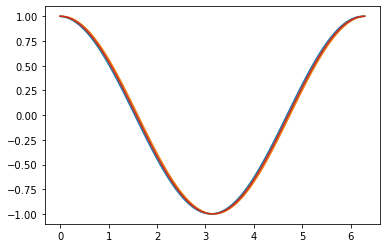

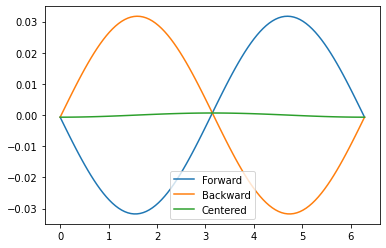

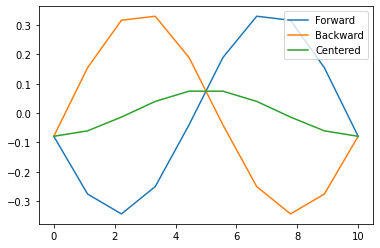

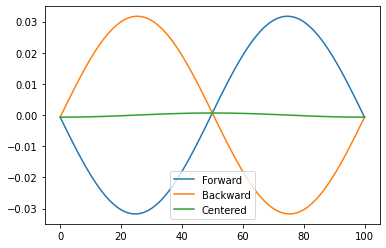

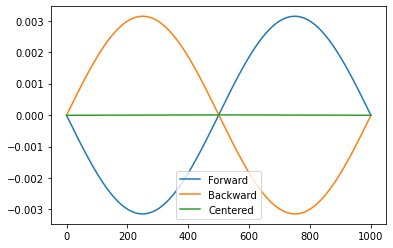

In [28]:
# Code here for Exercise 1

x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

forward = forward_dy(y, x)
backward = backward_dy(y, x)
centered = centered_dy(y, x)
actual = np.cos(x)


plt.plot(x, forward)
plt.plot(x, backward)
plt.plot(x, centered)
plt.plot(x, actual)
plt.show()

fDiff = forward - actual
bDiff = backward - actual
cDiff = centered - actual

plt.plot(x, fDiff)
plt.plot(x, bDiff)
plt.plot(x, cDiff)
plt.legend(['Forward', 'Backward', 'Centered'])
plt.show()


def calc(N):
    x = np.linspace(0, 2*np.pi, N)
    y = np.sin(x)

    Ns = np.linspace(0, N, N)
    
    forward = forward_dy(y, x)
    backward = backward_dy(y, x)
    centered = centered_dy(y, x)
    actual = np.cos(x)


    fDiff = forward - actual
    bDiff = backward - actual
    cDiff = centered - actual


    
    plt.plot(Ns, fDiff)

    plt.plot(Ns, bDiff)

    plt.plot(Ns, cDiff)

    plt.legend(['Forward', 'Backward', 'Centered'])


calc(10)
plt.show()
calc(100)
plt.show()
calc(1000)
plt.show()


### Using `scipy.misc.derivative()`

SciPy offers a library function to compute derivatives along the lines of the code you just did. It uses a central difference formula, but with additional ability to use more than two points. Here is an example of its use. See full documentation at http://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html

In [29]:
from scipy.misc import derivative
import time

# Compute the derivative of sin(x) at x = pi
t0 = time.time()
dy_scipy_1 = derivative(func=np.sin, x0=np.pi, dx=1e-6, n=1, order=3)
t1 = time.time()
dy_scipy_2 = derivative(func=np.sin, x0=np.pi, dx=1e-6, n=1, order=101)
t2 = time.time()

dt1 = t1 - t0
dt2 = t2 - t1
print("Derivative using order = 3: %.5f, takes %.5f sec" % (dy_scipy_1, dt1))
print("Derivative using order = 101: %.5f, takes %.5f sec" % (dy_scipy_2, dt2))

Derivative using order = 3: -1.00000, takes 0.00018 sec
Derivative using order = 101: -1.00000, takes 0.00656 sec


The arguments here are as follows:

    func:  the name of the function whose derivative you want to calculate
    x0:    the location of the value (scalar) or values (numpy array) where you want to evaluate the derivative
    dx:    spacing between the points it generates (by evaluating `func`) to calculate the differences
    n:     the number of derivatives. `n=1` means first derivative of `func`
    order: number of points to use in the difference method. Must be odd.

### Exercise 2

1. Use the `scipy.misc.derivative()` function with `order=3` to estimate the derivative of the $sin(x)$ like you did above, compute the difference relative to the analytical result, and plot this difference along with the difference you obtained for the centered estimates. Feel free to try changing some of the parameters like `dx` or `order` and see how they impact your result.

1. Try a different value of `n` (the number of derivatives). Plot your estimates of `n`-th derivative. Does it behave like you expect?

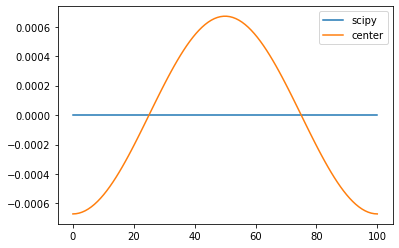

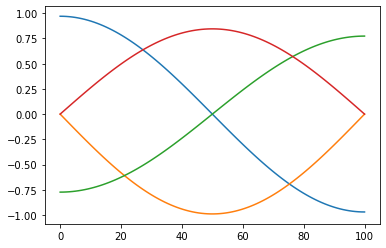

In [107]:
# Code for Exercise 2

x = np.linspace(0, 2*np.pi, 100)
dy_scipy_1 = derivative(func=np.sin, x0=x, dx=1e-6, n=1, order=5)

Ns = np.linspace(0, 100, 100)

y= np.sin(x)
actual = np.cos(x)

centered = centered_dy(y, x)

cDiff = centered - actual
dyDiff = dy_scipy_1 - actual

plt.plot(Ns, dyDiff)
plt.plot(Ns, cDiff)
plt.legend(['scipy', 'center'])
plt.show()

x1 = np.linspace(0, np.pi, 100)

dy_scipy_1s = derivative(func=np.sin, x0=x1, n=1, order=5)
dy_scipy_2 = derivative(func=np.sin, x0=x1,  n=2, order=5)
dy_scipy_3 = derivative(func=np.sin, x0=x1,  n=3, order=5)
dy_scipy_4 = derivative(func=np.sin, x0=x1, n=4, order=5)

plt.plot(Ns, dy_scipy_1s)
plt.plot(Ns, dy_scipy_2)
plt.plot(Ns, dy_scipy_3)
plt.plot(Ns, dy_scipy_4)

If your data are very noisy, numerical errors on computed derivatives will be large; derivatives tend to magnify noise. In these cases, you have to employ smoothing techniques, either implicitly by using a multipoint derivative formula, or explicitly by smoothing the data yourself, or taking the derivative of a function that has been fit to the data in the neighborhood you are interested in.

Here is an example of a 4-point centered difference of some noisy data (courtesy http://gilgamesh.cheme.cmu.edu/doc/software/jacapo/9-numerics/9.1-numpy/9.2-integration.html#numerical-differentiation):

$$f'(x_i) = \frac{f(x_{i-2}) - 8f(x_{i-1}) + 8f(x_{i+1}) - f(x_{i+2})}{12h}$$


In [52]:
def four_point_dy(y, x):
    '''
        Calculates dy/dx using a 4-point center differencing using array slices

        \frac{y[i-2] - 8y[i-1] + 8[i+1] - y[i+2]}{12h}

        y[0] and y[1] must be defined by lower order methods
        and y[-1] and y[-2] must be defined by lower order methods
    '''

    dy = np.zeros(y.shape,float) #we know it will be this size
    h = x[1]-x[0] #this assumes the points are evenly spaced!
    dy[2:-2] = (y[0:-4] - 8*y[1:-3] + 8*y[3:-1] - y[4:])/(12.* h)

    dy[0] = (y[1]-y[0])/(x[1]-x[0])
    dy[1] = (y[2]-y[1])/(x[2]-x[1])
    dy[-2] = (y[-2] - y[-3])/(x[-2] - x[-3])
    dy[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])
    
    return dy

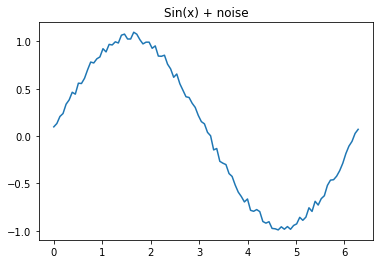

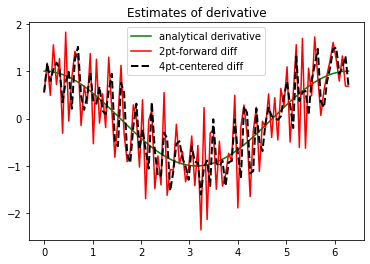

In [53]:
x = np.linspace(0, 2 * np.pi,100)
y = np.sin(x) + 0.1 * np.random.rand(x.shape[0])

dy_analytical = np.cos(x) # analytical derivative
dyf = forward_dy(y, x) # forward derivative for comparison
dy4 = four_point_dy(y, x) # four-point derivative

# Plot the original noisy function
plt.figure()
plt.plot(x,y,label='original function')
plt.title('Sin(x) + noise')
plt.show()

# Plot the derivatives as computed in different ways
plt.figure()
plt.plot(x,dy_analytical,'g',label='analytical derivative')
plt.plot(x,dyf,'r-',label='2pt-forward diff')
plt.plot(x,dy4,'k--',lw=2,label='4pt-centered diff')
plt.legend(loc='upper center')
plt.title('Estimates of derivative')
plt.show()

## Numerical integration

Material borrowed and modified from http://www.physics.nyu.edu/pine/pymanual/html/chap9/chap9_scipy.html

When a function cannot be integrated analytically, or is very difficult to integrate analytically, one generally turns to numerical integration methods. SciPy has a number of routines for performing numerical integration. Most of them are found in the same scipy.integrate library. See http://docs.scipy.org/doc/scipy-0.14.0/reference/integrate.html for the full reference and documentation


### Single integration

The function `scipy.integrate.quad()` is the workhorse of SciPy’s integration functions. Numerical integration is sometimes called *quadrature* (see lecture notes), hence the name. It is normally the default choice for performing single integrals of a function $f(x)$ over a given fixed range from $a$ to $b$:

$$\int_a^b f(x) dx$$

The simplest way to call this function is as follows: `scipy.integrate.quad(f, a, b)`. The arguments are defined as follows:
    
    f: the name of the function that you want to integrate
    a: the lower limit of integration
    b: the upper limit of integration
    
The routine uses adaptive quadrature methods to numerically evaluate integrals, meaning it successively refines the subintervals (makes them smaller) until a desired level of numerical precision is achieved. There are optional keyword arguments that you can pass to this function to change what this level of precision is or to set an upper limit on how many subintervals can be made. For a full list of these optional arguments, see https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html. Typically, the default value of precision (for the quad routine, it is 1e-8) will suffice.

As an example, let’s integrate a Gaussian function over the range from $-1$ to $1$

$$\int_{-1}^1 \frac{1}{\sqrt{2\pi}} \exp\left(-\frac{x^2}{2}\right) dx$$

We first need to define the function $f(x)=e^{-x^2/2}/\sqrt{2\pi}$.


In [54]:
import scipy.integrate

def func(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)

print(scipy.integrate.quad(func, -1, 1))

(0.682689492137086, 7.579375928402476e-15)


You can see that this gives two outputs. The first is the value of the integral `0.68268`. The second is an estimate of the precision of the answer `7.57937e-15`, which is very good. You can store the two values as follows:

In [55]:
# Store the two values

val, err = scipy.integrate.quad(func, -1, 1)

# Or ignore the second value

val, _ = scipy.integrate.quad(func, -1, 1)

And just for reference, you can also use $\pm \infty$ as your integration limits:

In [56]:
print(scipy.integrate.quad(func, -np.inf, +np.inf))

(0.9999999999999998, 1.0178191320905743e-08)


### Integrating sampled data

If you don't have a known closed or code-able form for your function--in other words, you just have data--you can use one of the following methods to estimate the integral of the underlying function: `scipy.integrate.trapz()`, `scipy.integrate.simps()`, or `scipy.integrate.romb()`, which are the trapezoid, Simpson rule, and Romberg rule methods for integrating functions. Of course, you can also use these methods to estimate the integrals of known functions like the ones we have evaluated using `scipy.integrate.quad()`.



Trapezoid rule gives:	 5.36288
Simpson rule gives:	 5.33489
Exact value:		 5.33333


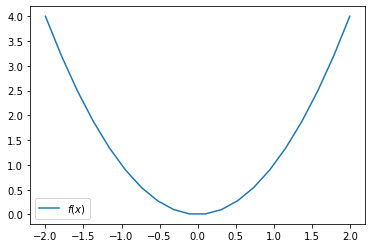

In [66]:
x = np.linspace(-2, 2, 20)
y = x**2

integral_trapz = scipy.integrate.trapz(y,x )
integral_simps = scipy.integrate.simps(y, x)
integral_exact = 16.0 / 3.0

print("Trapezoid rule gives:\t %.5f" % integral_trapz)
print("Simpson rule gives:\t %.5f" % integral_simps)
print("Exact value:\t\t %.5f" % integral_exact)

plt.plot(x,y,label="$f(x)$")
plt.legend()
plt.show()

### Exercise 3

Compute a numerical integral 

$$\int_{-1}^1 \frac{1}{\sqrt{2\pi}} \exp\left(-\frac{x^2}{2}\right) dx$$

using an array of $N$ = 10,100, and 1000 samples, and trapezoid and Simpson methods; compare the precision of these estimates of the integral to what the Scipy quadrature method returns.

In [73]:
# Code for Exercise 3

def func(x):
    return ((1/(np.sqrt(2 * np.pi)))*np.exp(-(x*x)/2))

val, err = scipy.integrate.quad(func, -1, 1)

print('The scipy.integrate quad mehtod returns an integral of {0}'.format(val))
print('\n \n \n')

def calc(N):
    x = np.linspace(-1, 1, N)
    y= []
    
    for value in x:
        y.append(((1/(np.sqrt(2 * np.pi)))*np.exp(-(value*value)/2)))


    integral_trapz = scipy.integrate.trapz(y, x)
    integral_simps = scipy.integrate.simps(y, x)
    print('For N = {0}'.format(N))
    print("Trapezoid rule gives:\t %.9f" % integral_trapz)
    print("Simpson rule gives:\t %.9f" % integral_simps)
    print('\n \n \n')

calc(10)
calc(100)
calc(1000)

The scipy.integrate quad mehtod returns an integral of 0.682689492137086

 
 

For N = 10
Trapezoid rule gives:	 0.680694674
Simpson rule gives:	 0.682651864

 
 

For N = 100
Trapezoid rule gives:	 0.682673033
Simpson rule gives:	 0.682689490

 
 

For N = 1000
Trapezoid rule gives:	 0.682689331
Simpson rule gives:	 0.682689492

 
 

